<a href="https://colab.research.google.com/github/R12942159/NTU_ML/blob/Hw3/Solve%20Laplacian%20Eigenmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import 3D plotting tools

In [2]:
W = np.array([
    [0,1,1,1,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,1,0,0],
    [1,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,1],
    [0,1,1,0,0,0,0,0,1,0],
    [0,0,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,0,1,0,1,0],
])

In [3]:
D = np.diag(np.sum(W,axis=-1))

In [5]:
L = D - W

$
minimize \quad Trace(\Psi^T L \Psi ) \\
let :  \Phi  = D^{1/2}\psi \\
minimize \quad Trace(\Phi^T D^{-1/2}LD^{1/2}\Phi )
$

We can get : $ D^{-1/2}LD^{-1/2} \phi_i = \lambda_i \phi_i$

then, $ \Psi = D^{-1/2}\phi$

In [22]:
D_inverse_sqrt = np.sqrt(np.linalg.inv(D))

In [23]:
Eigenvalues, Eigenvectors = np.linalg.eig(np.dot(np.dot(D_inverse_sqrt, L), D_inverse_sqrt))

In [24]:
Eigenvectors = np.dot(D_inverse_sqrt, Eigenvectors)

In [41]:
Eigenvalues, Eigenvectors.T

(array([0.000, 0.067, 0.353, 0.677, 0.905, 1.139, 1.969, 1.823, 1.585,
        1.481]),
 array([[ 0.213,  0.213,  0.213,  0.213,  0.213,  0.213,  0.213,  0.213,
          0.213,  0.213],
        [ 0.188,  0.175,  0.158,  0.195, -0.363, -0.389, -0.288,  0.106,
         -0.037, -0.174],
        [ 0.142,  0.094, -0.000,  0.182,  0.252,  0.391, -0.064, -0.142,
         -0.370, -0.335],
        [ 0.091,  0.100, -0.307,  0.295, -0.094, -0.290,  0.229, -0.289,
         -0.073,  0.242],
        [ 0.195, -0.222,  0.422, -0.144, -0.024, -0.250,  0.245, -0.115,
         -0.232,  0.071],
        [-0.206,  0.237, -0.041, -0.110,  0.047, -0.339,  0.326,  0.218,
         -0.287, -0.138],
        [-0.051,  0.063,  0.091, -0.006, -0.375,  0.387,  0.341, -0.126,
          0.212, -0.285],
        [ 0.202, -0.198, -0.299, -0.002, -0.240,  0.292,  0.104,  0.290,
         -0.218,  0.070],
        [-0.270,  0.050,  0.236,  0.188, -0.201,  0.344, -0.109, -0.006,
         -0.276,  0.329],
        [-0.164, -0.2

#### Double check
$ \Psi^T D \Psi = I_{10} $

In [25]:
np.dot(np.dot(Eigenvectors.T, D), Eigenvectors)

array([[ 1.000,  0.000, -0.000, -0.000,  0.000, -0.000,  0.000, -0.000,
         0.000,  0.000],
       [ 0.000,  1.000,  0.000,  0.000,  0.000, -0.000, -0.000,  0.000,
         0.000, -0.000],
       [-0.000,  0.000,  1.000,  0.000,  0.000, -0.000, -0.000,  0.000,
         0.000,  0.000],
       [-0.000,  0.000,  0.000,  1.000,  0.000, -0.000, -0.000,  0.000,
         0.000, -0.000],
       [ 0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000, -0.000,
        -0.000, -0.000],
       [-0.000, -0.000, -0.000, -0.000,  0.000,  1.000,  0.000,  0.000,
         0.000,  0.000],
       [ 0.000, -0.000, -0.000, -0.000,  0.000,  0.000,  1.000,  0.000,
        -0.000,  0.000],
       [-0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  1.000,
         0.000, -0.000],
       [ 0.000,  0.000,  0.000,  0.000, -0.000,  0.000, -0.000,  0.000,
         1.000, -0.000],
       [ 0.000, -0.000,  0.000, -0.000, -0.000,  0.000,  0.000, -0.000,
        -0.000,  1.000]])

##### Eigenvalues

In [26]:
df = {'Eigenvalues': np.round(Eigenvalues, 4)}
pd.DataFrame(data=df)

,Eigenvalues
0,0.0000
1,0.0674
2,0.3535
3,0.6769
4,0.9048
5,1.1391
6,1.9694
7,1.8231
8,1.5850
9,1.4807


#### Eigenvectors

In [28]:
column_names = [f'Eigenvector{i+1}' for i in range(10)]
df = {column_name: np.round(Eigenvectors.T[i], 4) for i, column_name in enumerate(column_names)}
df = pd.DataFrame(df)
df

,Eigenvector1,Eigenvector2,Eigenvector3,Eigenvector4,Eigenvector5,Eigenvector6,Eigenvector7,Eigenvector8,Eigenvector9,Eigenvector10
0,0.2132,0.1883,0.1419,0.0907,0.1949,-0.2063,-0.0508,0.2025,-0.2702,-0.1641
1,0.2132,0.1746,0.0936,0.0997,-0.2222,0.2370,0.0628,-0.1984,0.0502,-0.2954
2,0.2132,0.1576,-0.0005,-0.3065,0.4215,-0.0406,0.0911,-0.2991,0.2360,0.0541
3,0.2132,0.1946,0.1821,0.2947,-0.1437,-0.1102,-0.0062,-0.0025,0.1880,0.4780
4,0.2132,-0.3628,0.2525,-0.0935,-0.0238,0.0471,-0.3755,-0.2405,-0.2014,0.0909
5,0.2132,-0.3890,0.3905,-0.2895,-0.2500,-0.3387,0.3873,0.2921,0.3443,-0.1891
6,0.2132,-0.2877,-0.0640,0.2291,0.2455,0.3255,0.3407,0.1037,-0.1086,0.1017
7,0.2132,0.1057,-0.1425,-0.2888,-0.1147,0.2176,-0.1258,0.2900,-0.0059,0.1121
8,0.2132,-0.0365,-0.3695,-0.0730,-0.2320,-0.2872,0.2119,-0.2185,-0.2758,0.0797
9,0.2132,-0.1738,-0.3353,0.2416,0.0705,-0.1377,-0.2850,0.0697,0.3285,-0.1887


#### 3-D scatter plot in the reduced points (z1, z2, ..., z10)

In [29]:
z1 =
z2 =
z3 =

In [ ]:
# Create a 3-D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points
ax.scatter(Eigenvectors[:, 0], Eigenvectors[:, 1], Eigenvectors[:, 2], c='b', marker='o')

# Add labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

#### (4)

$Trace(\psi^T L \psi) = 1.0978$

$\psi^T D \psi = I_3$

In [47]:
np.trace(np.dot(np.dot(Eigenvectors.T[1:4], L), Eigenvectors.T[1:4].T))

1.0978030751206411

In [50]:
np.dot(np.dot(Eigenvectors.T[1:4], D), Eigenvectors.T[1:4].T)

array([[1.000, 0.000, 0.000],
       [0.000, 1.000, 0.000],
       [0.000, 0.000, 1.000]])

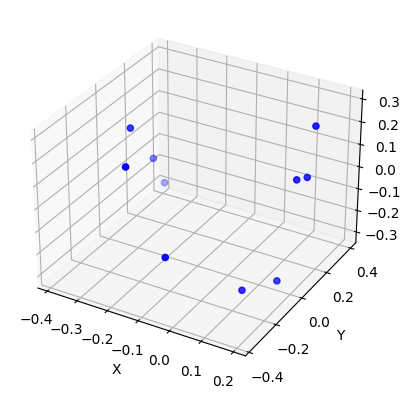

In [66]:
# Create a 3-D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the points
ax.scatter(Eigenvectors[:, 1], Eigenvectors[:, 2], Eigenvectors[:, 3], c='b', marker='o')

# Add labels for each axis
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()